In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("amazon_prime_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
df.shape

(9668, 12)

df.info()

**Q1. Is there is a duplicate records in this dataset ? if yes, then remove them**

In [5]:
df.duplicated().sum()      # if we found any dublicate date then will use "df.drop_duplicates(inplace=True)"

0

In [6]:
df.shape

(9668, 12)

**Q2. Is there is a null values in this data ? If yes then show it in the heatmap**

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

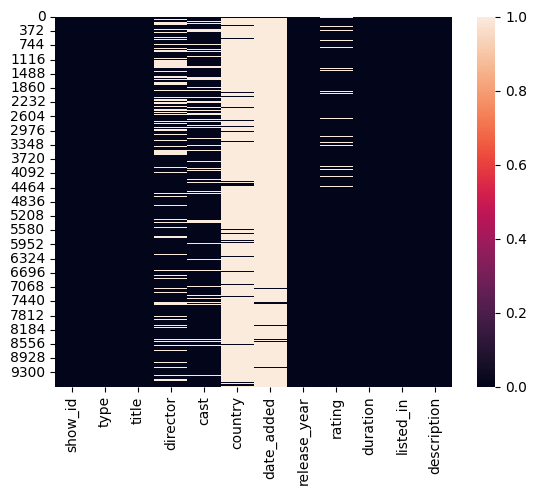

In [8]:
sns.heatmap(df.isnull())
plt.show()

**Q3. For ‘Monster Maker’ movie what is the show_id and who is the director of this movie ?**

In [9]:
df.loc[df["title"]=="Monster Maker",["show_id","title","director"]]

,show_id,title,director
4,s5,Monster Maker,Giles Foster


**Q4. In which year highest number of TV shows and movies released ? show it in the
bar chart**

In [10]:
df.dtypes # release_year column is in int64 format required to be change in date

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [11]:
# df.release_year = pd.to_datetime(df.release_year)
# df.release_year.dtype

In [12]:
results = df.groupby(df.release_year)["show_id"].count().sort_values(ascending=False)
results.head()
# in 2021 highest number of movies and web series are released                        

release_year
2021    1442
2020     962
2019     929
2018     623
2017     562
Name: show_id, dtype: int64

<Axes: xlabel='release_year'>

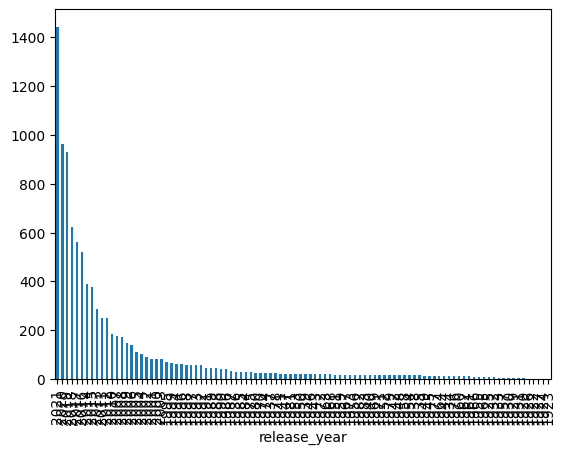

In [45]:
df.groupby(df.release_year)["show_id"].count().sort_values(ascending=False).plot.bar()

**Q5. How many Movies and TV series are in the dataset ? Show it in bar chart**

In [14]:
df["type"].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

<Axes: xlabel='type'>

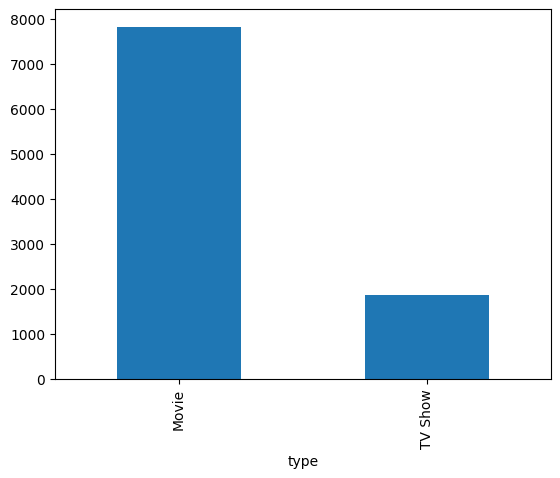

In [15]:
 df["type"].value_counts().plot.bar()
# Movies are 3X as compare to webseries because web series trend has emerged
# in recent 2-3 years

**Q6. How many ‘movies’ are made in year 2020 ?**

In [16]:
# to check both TV Shows and Movies 
len(df[(df["type"].isin(["Movie", "TV Show"])) & (df["release_year"] == 2020)])

962

In [17]:
# to check only movies nade in 2020
print(len(df[(df["type"]=="Movie") & (df["release_year"]==2020)]),"‘movies’ are made in year 2020")

736 ‘movies’ are made in year 2020


**Q7. How many Titles are released in India only ?**

In [18]:
print(len(df[df["country"]=="India"]),"Titles are released in India")

229 Titles are released in India


**Q8. Top 10 directors who gave highest number of movies or web series**

In [19]:
 df["director"].value_counts().head(10)

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: count, dtype: int64

**Q9. Show the records where ‘category is movie’ and ‘type is comedy’ or ‘country is UK’**

In [20]:
df[(df.type=="Movie") & (df["type"].str.contains("Comedy", case=False) | (df["country"]=="United Kingdom"))].head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
14,s15,Movie,Elon Musk: The Real Life Iron Man,Sonia Anderson,"Elon Musk, Per Wimmer, Julie Anderson-Ankenbra...",United Kingdom,"May 2, 2021",2018,NaN,74 min,Documentary,"Discover the meteoric rise of Elon Musk, the m..."
374,s375,Movie,The Zombie King,Aidan Belizaire,"Edward Furlong, Corey Feldman, George McCluskey",United Kingdom,NaN,2013,16+,96 min,"Comedy, Horror",After heartbroken widower Samuel makes a deal ...
656,s657,Movie,The Flaw,David Sington,"Andrew Luan, Robert Shiller, Louis Hyman",United Kingdom,NaN,2011,13+,81 min,Special Interest,The definitive doc on the 2008 financial crash...
892,s893,Movie,Stick Man,"Jeroen Jaspaert, Daniel Snaddon","Martin Freeman, Jennifer Saunders, Russell Tov...",United Kingdom,NaN,2015,ALL,27 min,"Adventure, Animation, Kids",A half-hour animation based on the much-loved ...
2095,s2096,Movie,Instant Death,Ara Paiaya,Lou Ferrigno,United Kingdom,NaN,2017,18+,84 min,Action,A gang war for drug dominance draws in a distu...
2364,s2365,Movie,Get Duked!,Ninian Doff,"Eddie Izzard, Kate Dickie, James Cosmo, Samuel...",United Kingdom,NaN,2020,16+,87 min,"Adventure, Comedy","Get Duked is an anarchic, hip-hop inspired com..."
2381,s2382,Movie,Gascoigne,Jane Preston,"Paul Gascoigne, Vinnie Jones, Gary Lineker, Jo...",United Kingdom,NaN,2015,16+,87 min,Documentary,Celebrating the life and achievements of natur...
2534,s2535,Movie,Everybody's Game,Beno Obano,"Maro Itoje, Beno Obano, Anthony Watson, Ellis ...",United Kingdom,NaN,2020,16+,53 min,Documentary,Coming from the most unlikely of rugby playing...


**Q10. In how many movies / tv shows “salman khan” was casted ?**

In [21]:
len(df[df["cast"].str.contains("salman khan", case=False, na=False)])

10

**Q11. What are the different Ratings provided by amazon prime ?**

In [22]:
print(df["rating"].unique())

[nan '13+' 'ALL' '18+' 'R' 'TV-Y' 'TV-Y7' 'NR' '16+' 'TV-PG' '7+' 'TV-14'
 'TV-NR' 'TV-G' 'PG-13' 'TV-MA' 'G' 'PG' 'NC-17' 'UNRATED' '16' 'AGES_16_'
 'AGES_18_' 'ALL_AGES' 'NOT_RATE']


**Q12. How many movies got the ‘AGES_18_’ rating in ‘india’ ?**

In [23]:
len(df[(df["rating"]=='18+') & (df["country"]=='India')])

20

**Q13. How many movies get ‘16+’ rating in year ‘2019’ ?**

In [24]:
len(df[(df["rating"]=='16+') & (df["release_year"]==2019)])

142

**Q14. What is the max duration of Movie/Show in this dataset ?**

In [25]:
df.duration.value_counts().head()

duration
1 Season     1342
2 Seasons     229
90 min        223
91 min        220
92 min        203
Name: count, dtype: int64

In [26]:
df[["Minutes","Unit"]] = df["duration"].str.split(" ", expand=True)
df[["Minutes","Unit"]].head()

,Minutes,Unit
0,113,min
1,110,min
2,74,min
3,69,min
4,45,min


In [29]:
df["Minutes"].dtype

dtype('O')

In [31]:
df["Minutes"] = df["Minutes"].astype("int64")
df["Minutes"].dtype

dtype('int64')

In [32]:
print("The max duration in this dataset is ---->>>>",df["Minutes"].max(),"Minutes")

The max duration in this dataset is ---->>>> 601 Minutes


**Q15. Which Individual Country has maximum number of TV Shows ?**

In [34]:
df_tv = df[df["type"]=="TV Show"]
df_tv["country"].value_counts().sort_values(ascending=False).head(3)
# United States has most number of TV Shows

country
United States    59
India            16
Spain             5
Name: count, dtype: int64

**Q16. Find out the instances where category is ‘movie’ and type is ‘drama’ ?**

In [39]:
df[(df["type"]=="Movie") & (df["listed_in"]=="Drama")].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,Unit
9,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,NaN,92 min,Drama,Sally Goodson is a devoted mother to her autis...,92,min
24,s25,Movie,Zandalee,Sam Pillsbury,"Nicolas Cage, Judge Reinhold, Erika Anderson, ...",NaN,NaN,1991,R,94 min,Drama,Zandalee has grown bored with her poet-turned-...,94,min
32,s33,Movie,Young Lovers,Ida Lupino,"Sally Forrest, Keefe Brasselle, Hugh O'Brian, ...",NaN,NaN,1949,18+,86 min,Drama,Talented and beautiful Carol Williams (Forrest...,86,min
36,s37,Movie,You're Not You,George C. Wolfe,"Hilary Swank, Emmy Rossum, Josh Duhamel",NaN,NaN,2015,R,103 min,Drama,A drama centered on a classical pianist who ha...,103,min
73,s74,Movie,Words On Bathroom Walls,Thor Freudenthal,"Charlie Plummer, Taylor Russell, Andy Garcia, ...",NaN,NaN,2020,PG-13,111 min,Drama,"Diagnosed with a mental illness, a witty, intr...",111,min
